In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

In [2]:
df[['embark_town','survived']].groupby(['embark_town']).mean().sort_values(by='survived',ascending=False)

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


- 시각화 하는 모듈이 대부분
- matplotlib
- seaborn 
    - 대표적인 그림그리는 시각화 코드

- 우리가 생존율에 대한 예측을 하는 것
    - 생존율을 예측하기 위해서는 중요한 변수인 생존 (y값)과 다른 피처들의 관계를 살펴봐야 한다!
- 시각화를 한다는 것은 
    - 1차원
        - 하나의 변수의 분포 등을 시각화 할 수 있다.
    - 2차원( 다차원 )
        - 2개 이상의 변수를 비교해서
        - 두 변수간의 관계를 확인할 수 있다.
        - 생존이라는 y와 다른 변수들의 관계를 살펴보면서 
        - 다른 변수들이 생존에 어떤 영향을 미치는지 살펴보자!

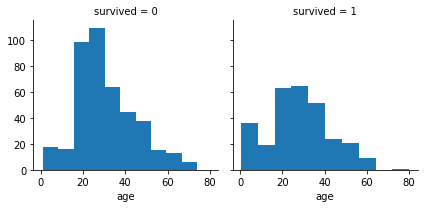

In [3]:
#matplot 시각화 패키지를 가지고 오는 모듈
import matplotlib.pyplot as plt
# age와 survived 관계

g1 =sns.FacetGrid(df, col='survived')
g1.map(plt.hist,'age')

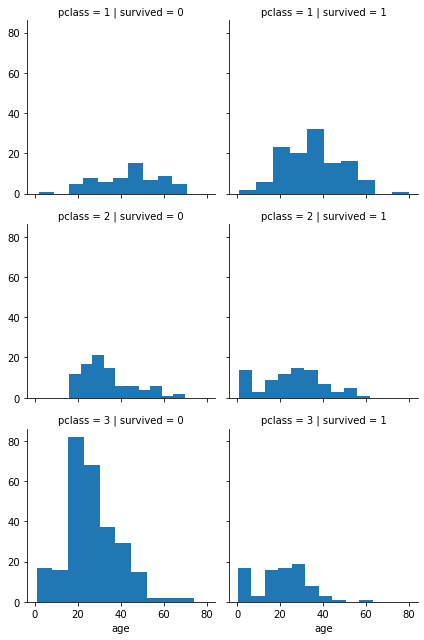

In [4]:
##pclass와 age와 survived는?

g2 =sns.FacetGrid(df, col='survived',row='pclass')
g2.map(plt.hist,'age')

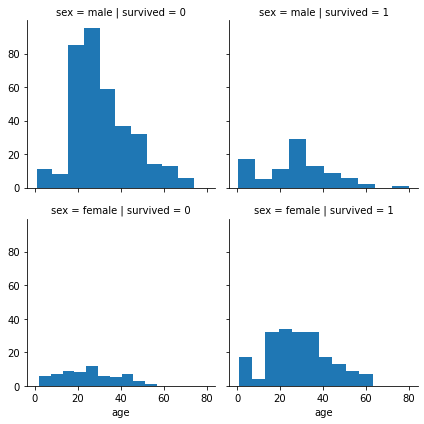

In [5]:
g3 =sns.FacetGrid(df, col='survived',row='sex')
g3.map(plt.hist,'age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


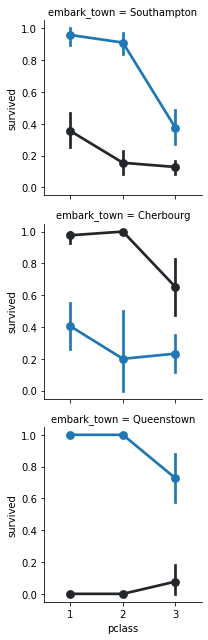

In [6]:
g4 =sns.FacetGrid(df, row='embark_town')
g4.map(sns.pointplot,'pclass','survived','sex')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


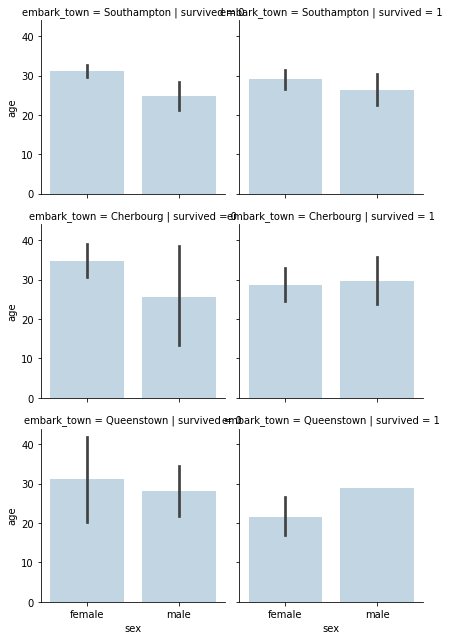

In [7]:
g5 =sns.FacetGrid(df, col='survived',row='embark_town')
g5.map(sns.barplot,'sex','age',alpha=0.3)
g5.add_legend()#범례설정

## 본격적인 타이타닉 데이터 전처리 & 모델링 과정

In [27]:
## 새로운 타이타닉 데이터 불러오기!
train_df=pd.read_csv('C:/Users/user/BDA_Data/Dataset/train_1.csv')
test_df=pd.read_csv('C:/Users/user/BDA_Data/Dataset/test_1.csv')

## train, test를 같이 합쳐서 분석할 예정
- 불필요한 피처는 제거하고 
- 기존에 없던 새로운 피처에 대해서 어떤 식으로 전처리 하면 좋을지?

In [28]:
# 불필요한 컬럼 삭제 후 데이터 리스트 병합
# 컬럼 삭제할 때 사용하는 drop(컬럼) 컬럼 2개 이상이면 [], axis=1 지정해서 사용하면 된다.
train_df=train_df.drop(['Ticket','Cabin'],axis=1) 
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df, test_df]

# Name 피처 전처리 
- 전처리 하기 위해서
- 기본적으로 정규표현식 문법
- 정규표현식에 대한 이해를 통해 전처리를 진행하는 것, 
- 정규표현식은 python 기초문법 과정이라 따로 수업하진 않고
- 판다스에서 정규표현식 전처리 진행할 때 같이 사용하는 문버
- **데이터프레임.str.(원하는 전처리 문법을 사용하면 된다.)**
    - str 문법과 사용하는 다양한 함수
        - extract
        - contains
        - replace 
        - 등등 다양한 함수 존재한다.

In [29]:
train_df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [30]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [31]:
for df in combine:
    df['Name_re'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True) # 데이터 추출에 필요한 extract 함수를 사용해서 (정규표현식 사용)

In [32]:
##새로운 피처가 생겼으니 이 피처가 어떤 관계인지가 궁금하다.
## 생존과 어떤 관계인지?

## 판다스에 제공하는 crosstab() 엑셀의 피벗테이블 
## 빈도 계산할 때 사용할 수 있는 함수

# 우리가 매핑했던 피처가 잘 되었는지 확인할 수 있음
pd.crosstab(train_df['Name_re'], train_df['Sex'])

Sex,female,male
Name_re,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
pd.crosstab(train_df['Name_re'], train_df['Pclass'])

Pclass,1,2,3
Name_re,,,
Capt,1,0,0
Col,2,0,0
Countess,1,0,0
Don,1,0,0
Dr,5,2,0
Jonkheer,1,0,0
Lady,1,0,0
Major,2,0,0
Master,3,9,28


In [34]:
## 전처리 문법을 응용하여
## replace를 통해 빈도와 중복된 의미를 정리하여 그룹핑 전처리 진행

for df in combine:
    df['Name_re'] = df['Name_re'].replace(['Lady','Countess','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    df['Name_re'] = df['Name_re'].replace('Mlle','Miss')
    df['Name_re'] = df['Name_re'].replace('Ms','Miss')
    df['Name_re'] = df['Name_re'].replace('Mme','Miss')

In [35]:
# 우리가 전처리한 피처를 통해 생존율에 대해서 좀 더 유의미한 인사이트를 확인할 수 있다!
train_df[['Name_re','Survived']].groupby(['Name_re'],as_index=False).mean()

,Name_re,Survived
0,Capt,0.000000
1,Col,0.500000
2,Master,0.575000
3,Miss,0.704301
4,Mr,0.156673
5,Mrs,0.792000
6,Rare,0.350000


### 우리는 생존율을 예측하기 위해 전처리 작업을 진행한다!
- 머신은 Capt, Mr, 문자열에 대한 이해도 없다. 인식할 수 없다.
- 인코딩 작업 -> 문자열의 모든 데이터를 수치적으로 변경해 준다.
    - 지금 위에 있는 Name_re 의 피처를 다 수치로 변경해야 한다!
- **인코딩도 크게 2~3가지**
    - 원-핫 인코딩 - 1과 0으로 만드는 것
    - 레이블인코딩 - 1,2,3,4 식의 문자열 값을 순서로 매핑해서 만드는 것
    - 기타 빈도 기반 등등 그룹핑 등 인코딩
    

In [36]:
# 레이블 인코딩을 통해 변환 작업 진행하자
name_re = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}

In [37]:
## 실제 데이터에 다 변환처리 전처리 작업

for df in combine:
    df['Name_re']=df['Name_re'].map(name_re) # map함수를 같이 응용해서 전처리 작업하는 것
    df['Name_re']=df['Name_re'].fillna(0) # 나머지 값들은 0을 넣고싶다.
    #위의 name_re 를 제외한 나머지의 경우는 그냥 다 0으로 처리하고 싶다.
    #fillna() 결측치를 채워주는 함수
    # 데이터프레임.fillna(원하는 결측치 값을 넣기)
    #df.fillna(0)

In [38]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1.0


In [39]:
combine[1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,5.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,1.0


In [40]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1.0
